# Imports

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from numpy.random import normal, uniform, shuffle
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

import dill
import datetime

In [2]:
%matplotlib inline

In [17]:
# SEED = 73 # random seed

In [3]:
# dill.load_session('cache/data_preparation.db')

FileNotFoundError: [Errno 2] No such file or directory: 'cache/data_preparation.db'

In [19]:
# dill.dump_session('cached/1_Data_preparation.db')

In [3]:
data_path = 'data/not_cutted/'

In [4]:
if not os.path.exists(data_path):
        os.makedirs(data_path)

# Data reading

## Reading

In [5]:
csvs = [x for x in os.listdir('data/') if x.endswith('.csv')] # читаем имена файлов .csv

In [6]:
needed_csvs = []

for s in csvs:
    if 'CDC' in s:
        needed_csvs.append(s)

In [7]:
nms = [x.split('.')[0] for x in needed_csvs] # список имён будущих датафреймов сделаем без расширений

In [8]:
nms

['AP1_CDCFrontier_LD',
 'AP1_CDCFrontier_SD',
 'FD_CDCFrontier_LD',
 'FD_CDCFrontier_SD',
 'FTa1_CDCFrontier_LD',
 'FTa1_CDCFrontier_SD',
 'FTa2_CDCFrontier_LD',
 'FTa2_CDCFrontier_SD',
 'FTa3_CDCFrontier_LD',
 'FTa3_CDCFrontier_SD',
 'FTb_CDCFrontier_LD',
 'FTb_CDCFrontier_SD',
 'FTc_CDCFrontier_LD',
 'FTc_CDCFrontier_SD',
 'LFY_CDCFrontier_LD',
 'LFY_CDCFrontier_SD',
 'TFL1a_CDCFrontier_LD',
 'TFL1a_CDCFrontier_SD',
 'TFL1c_CDCFrontier_LD',
 'TFL1c_CDCFrontier_SD']

In [9]:
for i in range(len(nms)):
    nms[i] = '_'.join(nms[i].split('_CDCFrontier_'))

In [10]:
nms

['AP1_LD',
 'AP1_SD',
 'FD_LD',
 'FD_SD',
 'FTa1_LD',
 'FTa1_SD',
 'FTa2_LD',
 'FTa2_SD',
 'FTa3_LD',
 'FTa3_SD',
 'FTb_LD',
 'FTb_SD',
 'FTc_LD',
 'FTc_SD',
 'LFY_LD',
 'LFY_SD',
 'TFL1a_LD',
 'TFL1a_SD',
 'TFL1c_LD',
 'TFL1c_SD']

**Create a list of genes:**

In [11]:
genes = []
for i in range(len(nms)):
    genes.append(nms[i][:-3])

genes = list(set(genes))

In [12]:
genes.sort()

In [13]:
genes

['AP1', 'FD', 'FTa1', 'FTa2', 'FTa3', 'FTb', 'FTc', 'LFY', 'TFL1a', 'TFL1c']

In [14]:
data = {}
for i in range(len(nms)):
    data[nms[i]] = pd.read_csv('data/' + needed_csvs[i], header=None, names = ['days', 'rltv_transcription_lvl', 'std_error'])

In [15]:
print(len(data['FTa2_LD']))
print(len(data['FTa2_SD']))

15
14


In [16]:
data['AP1_LD']

,days,rltv_transcription_lvl,std_error
0,9,2,52.408729
1,11,0,52.408729
2,13,6,52.408729
3,15,5,52.408729
4,17,23,52.408729
5,20,33,52.408729
6,22,1,52.408729
7,25,92,89.000000
8,28,19,52.408729
9,30,355,106.000000


## Delete last

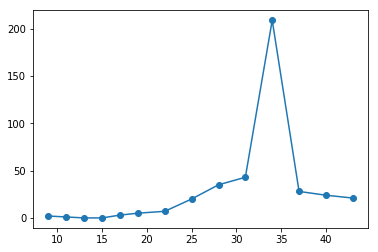

In [17]:
plt.plot(data['AP1_SD'].days, data['AP1_SD'].rltv_transcription_lvl, 'o-');

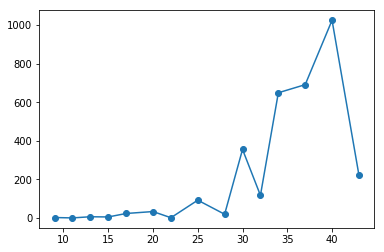

In [16]:
plt.plot(data['AP1_LD'].days, data['AP1_LD'].rltv_transcription_lvl, 'o-');

let's remove last measurements:

In [17]:
for name in data.keys():
    if name.endswith('LD'):
        data[name] = data[name].iloc[:-1,:]
    else:
        data[name] = data[name].iloc[:-3,:]

In [18]:
print(len(data['FTa2_LD']))
print(len(data['FTa2_SD']))

14
11


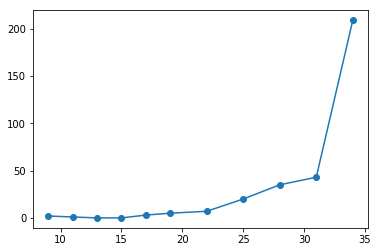

In [19]:
plt.plot(data['AP1_SD'].days, data['AP1_SD'].rltv_transcription_lvl, 'o-');

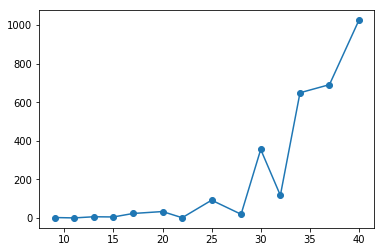

In [31]:
plt.plot(data['AP1_LD'].days, data['AP1_LD'].rltv_transcription_lvl, 'o-');

In [20]:
data['AP1_LD']

,days,rltv_transcription_lvl,std_error
0,9,2,52.408729
1,11,0,52.408729
2,13,6,52.408729
3,15,5,52.408729
4,17,23,52.408729
5,20,33,52.408729
6,22,1,52.408729
7,25,92,89.000000
8,28,19,52.408729
9,30,355,106.000000


## Create a sets of stds

In [100]:
stds = {}

for cond in ['LD', 'SD']:
    
    stds[cond] = pd.DataFrame()
    
    for g in genes:
        
        stds[cond][g] = data[f'{g}_{cond}'].std_error

In [101]:
for cond in ['LD', 'SD']:
    stds[cond].to_csv(f'{data_path}stds_{cond}.csv', index = False)

# Create real experiment dataset

In [20]:
genes + ['days']

['AP1',
 'FD',
 'FTa1',
 'FTa2',
 'FTa3',
 'FTb',
 'FTc',
 'LFY',
 'TFL1a',
 'TFL1c',
 'days']

In [21]:
real_data = {
    'LD': pd.DataFrame(columns=genes + ['days']),
    'SD': pd.DataFrame(columns=genes + ['days'])
}

In [22]:
for cond in ['LD', 'SD']:
    for name in genes:
        real_data[cond][name] = data[name + '_' + cond].rltv_transcription_lvl
    
    real_data[cond]['days'] = data['AP1_' + cond].days

In [23]:
real_data['SD']

,AP1,FD,FTa1,FTa2,FTa3,FTb,FTc,LFY,TFL1a,TFL1c,days
0,2,27.48,2,22,1.371,1,0.6,13,13.952,15.862,9
1,1,27.70,2,37,0.098,1,1.3,42,11.907,14.804,11
2,0,35.02,1,63,0.957,1,0.0,42,12.016,15.285,13
3,0,36.36,3,140,1.099,5,2.5,109,14.536,19.238,15
4,3,35.73,4,113,1.730,0,0.4,24,16.764,24.466,17
5,5,43.90,6,181,1.849,7,1.3,259,24.945,25.650,19
6,7,55.18,4,127,1.381,7,0.9,275,34.332,40.503,22
7,20,27.13,9,66,0.239,0,5.7,7,12.272,15.267,25
8,35,37.14,10,187,1.077,0,0.1,51,15.961,19.571,28
9,43,45.24,3,72,3.350,0,0.3,58,18.809,22.599,31


In [25]:
for cond in ['LD', 'SD']:
    real_data[cond].to_csv(data_path + 'real_' + cond + '.csv', index = False)

In [26]:
targets = [name for name in genes if not name.startswith('FT')]

In [27]:
targets

['AP1', 'FD', 'LFY', 'TFL1a', 'TFL1c']

In [28]:
real_X = {}

In [29]:
real_X['LD'] = real_data['LD'].iloc[:-1, :]
real_X['SD'] = real_data['SD'].iloc[:-1, :]

In [30]:
real_Y = {}
real_Y['LD'] = real_data['LD'][targets].iloc[1:,]
real_Y['SD'] = real_data['SD'][targets].iloc[1:,]

In [32]:
for cond in ['LD', 'SD']:
    real_X[cond].to_csv(data_path + 'real_X_' + cond + '.csv', index = False)
    real_Y[cond].to_csv(data_path + 'real_Y_' + cond + '.csv', index = False)

# Resampling

## Create samples base by days

In [33]:
print(data['AP1_LD']['days'].tolist())
print(data['AP1_SD']['days'].tolist())

[9, 11, 13, 15, 17, 20, 22, 25, 28, 30, 32, 34, 37, 40, 43]
[9, 11, 13, 15, 17, 19, 22, 25, 28, 31, 34, 37, 40, 43]


## Generate samples 

In [34]:
len(data['FD_LD'])

15

In [35]:
daily_levels = {'LD': {},
                'SD': {}}

In [36]:
days_LD = data['AP1_LD']['days'].tolist()
days_SD = data['AP1_SD']['days'].tolist()

In [37]:
print(days_LD)
print(days_SD)

[9, 11, 13, 15, 17, 20, 22, 25, 28, 30, 32, 34, 37, 40, 43]
[9, 11, 13, 15, 17, 19, 22, 25, 28, 31, 34, 37, 40, 43]


In [38]:
print('missing days in SD:', sorted(set(days_LD) - set(days_SD)))
print('missing days in LD:', sorted(set(days_SD) - set(days_LD)))

missing days in SD: [20, 30, 32]
missing days in LD: [19, 31]


In [39]:
days_all = sorted(set(days_LD + days_SD))
days_all

[9, 11, 13, 15, 17, 19, 20, 22, 25, 28, 30, 31, 32, 34, 37, 40, 43]

In [68]:
for day in days_all:
    daily_levels['LD'][day] = {}
    daily_levels['SD'][day] = {}

In [47]:
# for name in nms:
#     for day in data[name]['days']:
        
#         mean = float(data[name][data[name]['days'] == day].loc[:, 'rltv_transcription_lvl'])
#         std = float(data[name][data[name]['days'] == day].loc[:, 'rltv_transcription_lvl'])
        
#         if name.endswith('LD'):
#             if day < 37:
#                 daily_levels['LD'][day][name[:-3]] = normal(mean, std, 500)
#             else:
#                 daily_levels['LD'][day][name[:-3]] = normal(mean, std, 1000)
            
#         if name.endswith('SD'):
#             daily_levels['SD'][day][name[:-3]] = abs(normal(mean, std, 500))
        

In [55]:
# for name in nms:
#     for day in data[name]['days']:
        
#         mean = float(data[name][data[name]['days'] == day].loc[:, 'rltv_transcription_lvl'])
#         std = float(data[name][data[name]['days'] == day].loc[:, 'std_error'])
        
#         if name.endswith('LD'):
#             if day < 37:
#                 samples = normal(mean, std, 1500)
#                 samples = samples[samples > 0]
#                 daily_levels['LD'][day][name[:-3]] = samples[:500]
#             else:
#                 samples = normal(mean, std, 3000)
#                 samples = samples[samples > 0]
#                 daily_levels['LD'][day][name[:-3]] = samples[:1000]
            
#         if name.endswith('SD'):
#             samples = normal(mean, std, 1500)
#             samples = samples[samples > 0]
#             daily_levels['SD'][day][name[:-3]] = samples[:500]       

In [69]:
for name in nms:
    for day in data[name]['days']:
        
        mean = float(data[name][data[name]['days'] == day].loc[:, 'rltv_transcription_lvl'])
        std = float(data[name][data[name]['days'] == day].loc[:, 'std_error'])
        
        if name.endswith('LD'):
            samples = normal(mean, std, 1500)
            samples = samples[samples > 0]
            daily_levels['LD'][day][name[:-3]] = samples[:500]
            
        if name.endswith('SD'):
            samples = normal(mean, std, 1500)
            samples = samples[samples > 0]
            daily_levels['SD'][day][name[:-3]] = samples[:500]       

In [70]:
del samples

## Inter/extra-polate values to all missing days

### Sort dictionaries!!!

In [71]:
import collections

daily_levels['LD'] = collections.OrderedDict(sorted(daily_levels['LD'].items()))
daily_levels['SD'] = collections.OrderedDict(sorted(daily_levels['SD'].items()))

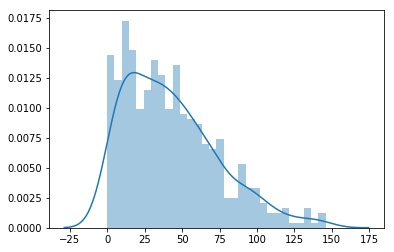

In [72]:
sns.distplot(daily_levels['LD'][11]['AP1'], bins = 30)

### Fill LD

In [73]:
for key in daily_levels['LD'].keys():
    print(key, ':', bool(daily_levels['LD'][key]))

9 : True
11 : True
13 : True
15 : True
17 : True
19 : False
20 : True
22 : True
25 : True
28 : True
30 : True
31 : False
32 : True
34 : True
37 : True
40 : True
43 : True


In [74]:
def custom_shuffle(arr):
    arr2 = arr.copy()
    shuffle(arr2)
    return arr2

In [75]:
def interpolate_days(daytype):
    for i in range(len(daily_levels[daytype])):
        if not bool(daily_levels[daytype][days_all[i]]):

            for name in genes:
                w = (days_all[i] - days_all[i-1]) / (days_all[i+1] - days_all[i-1])
                ''' # w is useful if missed day is 19 and it must interpolated by 17 and 20, analogue of average'''
                daily_levels[daytype][days_all[i]][name] = w * np.add(custom_shuffle(daily_levels[daytype][days_all[i-1]][name]),
                                                                      custom_shuffle(daily_levels[daytype][days_all[i+1]][name]))

In [76]:
interpolate_days('LD')

In [77]:
for key in sorted(daily_levels['LD'].keys()):
    print(key, ':', bool(daily_levels['LD'][key]))

9 : True
11 : True
13 : True
15 : True
17 : True
19 : True
20 : True
22 : True
25 : True
28 : True
30 : True
31 : True
32 : True
34 : True
37 : True
40 : True
43 : True


In [144]:
# [x + y for x, y in zip([1, 2, 3], [1,2,3])]

### Fill SD

In [78]:
for key in sorted(daily_levels['SD'].keys()):
    print(key, ':', bool(daily_levels['SD'][key]))

9 : True
11 : True
13 : True
15 : True
17 : True
19 : True
20 : False
22 : True
25 : True
28 : True
30 : False
31 : True
32 : False
34 : True
37 : True
40 : True
43 : True


**Let's delete two last elements from SD dict:**

In [51]:
del daily_levels['SD'][37]
del daily_levels['SD'][40]

In [65]:
for key in sorted(daily_levels['SD'].keys()):
    print(key, ':', bool(daily_levels['SD'][key]))

9 : True
11 : True
13 : True
15 : True
17 : True
19 : True
20 : False
22 : True
25 : True
28 : True
30 : False
31 : True
32 : False
34 : True
37 : True
40 : True
43 : True


Fill like LD:

In [79]:
interpolate_days('SD')

In [80]:
for key in sorted(daily_levels['SD'].keys()):
    print(key, ':', bool(daily_levels['SD'][key]))

9 : True
11 : True
13 : True
15 : True
17 : True
19 : True
20 : True
22 : True
25 : True
28 : True
30 : True
31 : True
32 : True
34 : True
37 : True
40 : True
43 : True


### Set FT level shift to 1/2 of a day:

In [81]:
for key in sorted(daily_levels['LD'].keys()):
    print(key, ':', len(daily_levels['LD'][key]['AP1']))

9 : 500
11 : 500
13 : 500
15 : 500
17 : 500
19 : 500
20 : 500
22 : 500
25 : 500
28 : 500
30 : 500
31 : 500
32 : 500
34 : 500
37 : 500
40 : 500
43 : 500


In [82]:
for key in sorted(daily_levels['SD'].keys()):
    print(key, ':', len(daily_levels['SD'][key]['AP1']))

9 : 500
11 : 500
13 : 500
15 : 500
17 : 500
19 : 500
20 : 500
22 : 500
25 : 500
28 : 500
30 : 500
31 : 500
32 : 500
34 : 500
37 : 500
40 : 500
43 : 500


In [151]:
# def move_FTs(daytype):
#     for name in genes:
#         if name.startswith('FT'):
#             current_FT = [[] for i in range(len(daily_levels[daytype]))]
            
#             current_FT[0] = daily_levels[daytype][days_all[0]][name] * 8. / 18. # move first day
            
#             for i in range(1, len(daily_levels[daytype])):
#                 ''' shift is 3/4 for 2 days difference 
#                 between observations and 1/2 for 1 day '''
#                 w = (1 + (days_all[i] - days_all[i-1])) / 4
#                 if days_all[i] != 37:
#                     current_FT[i] = w * np.add(daily_levels[daytype][days_all[i]][name],
#                                                daily_levels[daytype][days_all[i-1]][name])
#                 else:
#                     current_FT[i] = w * np.add(daily_levels[daytype][days_all[i]][name],
#                                                np.repeat(daily_levels[daytype][days_all[i-1]][name], 2))

#             for i in range(len(daily_levels[daytype])):
#                 daily_levels[daytype][days_all[i]][name] = current_FT[i]

In [83]:
def move_FTs(daytype):
    for name in genes:
        if name.startswith('FT'):
            current_FT = [[] for i in range(len(daily_levels[daytype]))]
            
            current_FT[0] = daily_levels[daytype][days_all[0]][name] * 8. / 18. # move first day
            
            for i in range(1, len(daily_levels[daytype])):
                ''' shift is 3/4 for 2 days difference 
                between observations and 1/2 for 1 day '''
                w = (1 + (days_all[i] - days_all[i-1])) / 4
                current_FT[i] = w * np.add(daily_levels[daytype][days_all[i]][name],
                                               daily_levels[daytype][days_all[i-1]][name])
                
            for i in range(len(daily_levels[daytype])):
                daily_levels[daytype][days_all[i]][name] = current_FT[i]

In [84]:
move_FTs('LD')
move_FTs('SD')

### Try to free the memory:

In [93]:
# def free_memory(variables_list):
#     for name in variables_list:
#         del name

In [94]:
# for key in globals().keys():
#     print(key)

### Save the data

In [95]:
# with open('cache/samples_by_day.cached', 'wb') as f:
#     dill.dump(daily_levels, f)

### Check the trend

In [85]:
for k in daily_levels['LD'].keys():
    print(k, ':', np.mean(daily_levels['LD'][k]['AP1']))

9 : 43.928919009282076
11 : 42.86406643747794
13 : 41.79587777139754
15 : 43.729832887427904
17 : 50.28558950100574
19 : 70.67731846783606
20 : 55.73038820074838
22 : 41.20452730065009
25 : 114.73475949076544
28 : 48.70372514257342
30 : 351.42336215438326
31 : 234.61311868864865
32 : 117.80287522291403
34 : 668.1534869485769
37 : 694.6412577533636
40 : 1018.2107910545636
43 : 225.5749426553969


In [86]:
data['AP1_LD'][['days', 'rltv_transcription_lvl']]

,days,rltv_transcription_lvl
0,9,2
1,11,0
2,13,6
3,15,5
4,17,23
5,20,33
6,22,1
7,25,92
8,28,19
9,30,355


In [87]:
test = []

for k in daily_levels['LD'].keys():
    test.append(daily_levels['LD'][k]['AP1'][300])

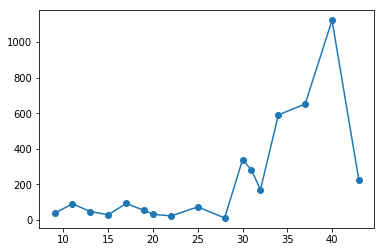

In [88]:
plt.plot(days_all, test, '-o')

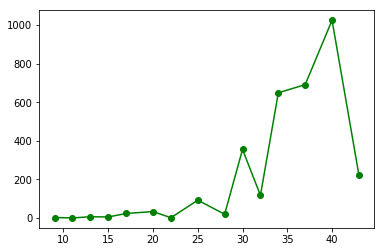

In [89]:
plt.plot(data['AP1_LD'].days, data['AP1_LD'].rltv_transcription_lvl, 'go-')

# Train-test split

In [90]:
conditions = ['LD', 'SD']

In [91]:
train_set = pd.DataFrame(columns=genes + ['days'])
test_set = pd.DataFrame(columns=genes + ['days'])

In [161]:
# for day in days_all:
#     if day < 37:
#         for cond in conditions:
#             temp_df = pd.DataFrame(daily_levels[cond][day]).iloc[:375, :]
#             temp_df['days'] = day
#             train_set = train_set.append(temp_df)
            
#             temp_df = pd.DataFrame(daily_levels[cond][day]).iloc[375:500, :]
#             temp_df['days'] = day
#             test_set = test_set.append(temp_df)
#     else:
#         temp_df = pd.DataFrame(daily_levels['LD'][day]).iloc[:750, :]
#         temp_df['days'] = day
#         train_set = train_set.append(temp_df)
        
#         temp_df = pd.DataFrame(daily_levels['LD'][day]).iloc[750:1000, :]
#         temp_df['days'] = day
#         test_set = test_set.append(temp_df)

In [92]:
for day in days_all:
    for cond in conditions:
        temp_df = pd.DataFrame(daily_levels[cond][day]).iloc[:375, :]
        temp_df['days'] = day
        train_set = train_set.append(temp_df)

        temp_df = pd.DataFrame(daily_levels[cond][day]).iloc[375:500, :]
        temp_df['days'] = day
        test_set = test_set.append(temp_df)

In [93]:
train_set.tail()

,AP1,FD,FTa1,FTa2,FTa3,FTb,FTc,LFY,TFL1a,TFL1c,days
370,19.533267,21.990897,12.381284,151.944683,2.999440,1.983981,12.153922,26.248205,10.926765,19.471704,43
371,36.189393,38.007495,8.407753,175.788601,2.482471,5.275085,2.983991,26.393600,13.146408,10.911093,43
372,34.188660,16.973848,9.880813,218.431779,2.761386,16.223098,7.360543,1.943543,7.586845,11.713444,43
373,42.993622,35.083533,10.044613,226.909571,1.683156,22.627339,27.144252,4.338056,10.537851,22.154665,43
374,17.110908,23.656439,9.954140,135.067760,0.968515,25.064686,28.834503,10.889699,12.172244,12.494907,43


In [94]:
test_set.days.value_counts()

43    250
22    250
11    250
13    250
15    250
17    250
19    250
20    250
25    250
40    250
28    250
30    250
31    250
32    250
34    250
37    250
9     250
Name: days, dtype: int64

In [95]:
train_set.days.value_counts()

43    750
22    750
11    750
13    750
15    750
17    750
19    750
20    750
25    750
40    750
28    750
30    750
31    750
32    750
34    750
37    750
9     750
Name: days, dtype: int64

In [165]:
X_train = train_set[train_set['days'] < 40]
X_test = test_set[test_set['days'] < 40]

In [166]:
FTs = [x for x in genes if x.startswith('FT')]
FTs

['FTa1', 'FTa2', 'FTa3', 'FTb', 'FTc']

In [167]:
y_train = train_set[train_set['days'] > 9].drop(FTs, axis=1)
y_test = test_set[test_set['days'] > 9].drop(FTs, axis=1)

## Write data to csvs 

In [169]:
X_train.to_csv('data/prepared/X_train.csv', index=False)
X_test.to_csv('data/prepared/X_test.csv', index=False)

y_train.to_csv('data/prepared/y_train.csv', index=False)
y_test.to_csv('data/prepared/y_test.csv', index=False)

train_set.to_csv('data/prepared/train.csv', index=False)
test_set.to_csv('data/prepared/test.csv', index=False)

# Model

In [ ]:
model = RandomForestRegressor()

In [ ]:
cv = TimeSeriesSplit(n_splits=len(days_all))

In [ ]:
def logging(description, out):
    string = str(description) + ': ' + str(out)
    with open('results/NN/NN_log.txt', 'a') as out_file:
        out_file.write(string + '\n')
    print(string)

In [ ]:
def clear_log():
    with open('results/NN/NN_log.txt', 'w') as out_file:
        out_file.write('log file have been cleared ' + str(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')))

In [ ]:
with open('cache/NN_model.cached', 'rb') as file:
    model = dill.load(file)

In [ ]:
with open('cache/st_scaler.cached', 'rb') as f:
    st_scalers = dill.load(f)

In [ ]:
dill.dump_session('cache/data_preparation.db')